<a href="https://colab.research.google.com/github/PimpatcharaCh/229352-StatisticalLearning2/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [2]:
from google.colab import files
files.upload()

Saving heart_disease.csv to heart_disease.csv


{'heart_disease.csv': b'"age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","label"\n63,1,1,145,233,1,2,150,0,2.3,3,0,6,0\n67,1,4,160,286,0,2,108,1,1.5,2,3,3,1\n67,1,4,120,229,0,2,129,1,2.6,2,2,7,1\n37,1,3,130,250,0,0,187,0,3.5,3,0,3,0\n41,0,2,130,204,0,2,172,0,1.4,1,0,3,0\n56,1,2,120,236,0,0,178,0,0.8,1,0,3,0\n62,0,4,140,268,0,2,160,0,3.6,3,2,3,1\n57,0,4,120,354,0,0,163,1,0.6,1,0,3,0\n63,1,4,130,254,0,2,147,0,1.4,2,1,7,1\n53,1,4,140,203,1,2,155,1,3.1,3,0,7,1\n57,1,4,140,192,0,0,148,0,0.4,2,0,6,0\n56,0,2,140,294,0,2,153,0,1.3,2,0,3,0\n56,1,3,130,256,1,2,142,1,0.6,2,1,6,1\n44,1,2,120,263,0,0,173,0,0,1,0,7,0\n52,1,3,172,199,1,0,162,0,0.5,1,0,7,0\n57,1,3,150,168,0,0,174,0,1.6,1,0,3,0\n48,1,2,110,229,0,0,168,0,1,3,0,7,1\n54,1,4,140,239,0,0,160,0,1.2,1,0,3,0\n48,0,3,130,275,0,0,139,0,0.2,1,0,3,0\n49,1,2,130,266,0,0,171,0,0.6,1,0,3,0\n64,1,1,110,211,0,2,144,1,1.8,2,0,3,0\n58,0,1,150,283,1,2,162,0,1,1,0,3,0\n58,1,2,120,284,0,2,160,0,1.8,2,0,3,1\n

In [3]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [5]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [6]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=9)

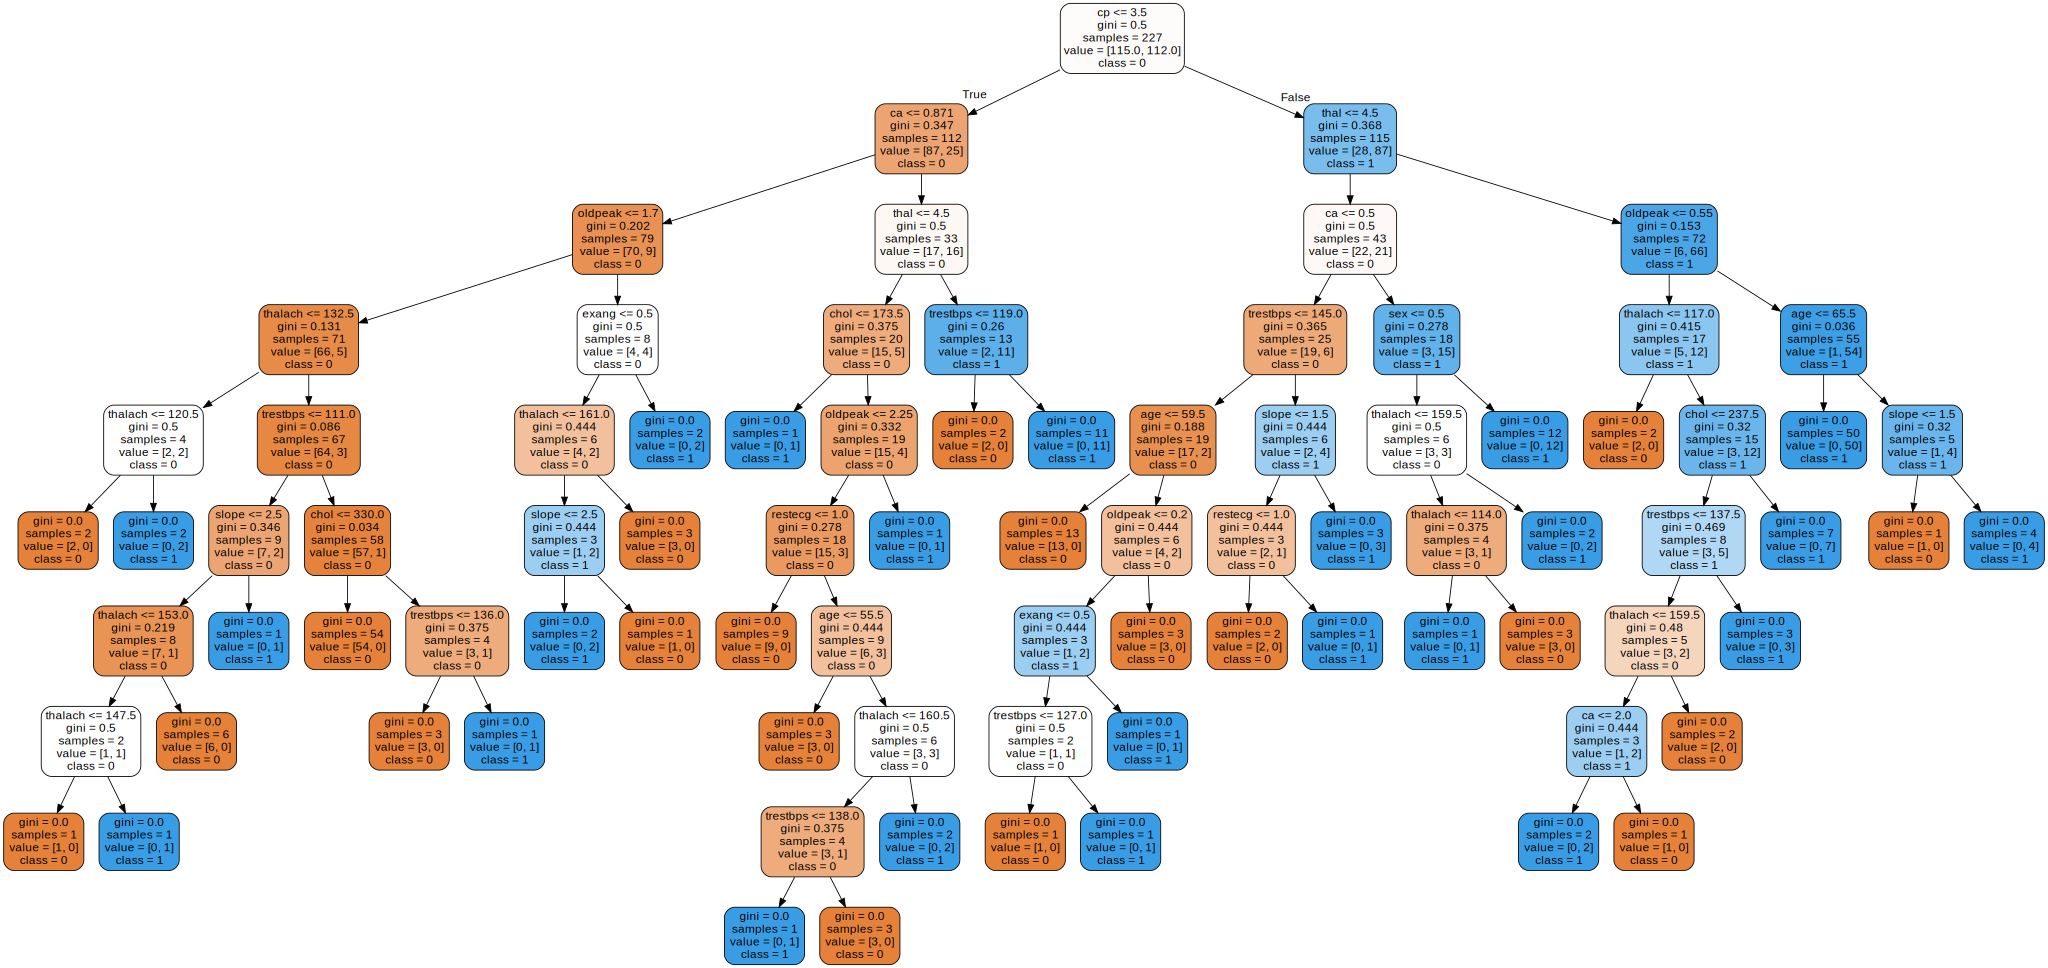

In [7]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [8]:
clf = DecisionTreeClassifier()

## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [10]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# parameters for GridSearch
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9, None]
}

gridcv_rf = GridSearchCV(
    rf,
    params,
    scoring='accuracy',
    cv=5
)

gridcv_rf.fit(X_train, y_train)

# best model
gridcv_rf.best_estimator_


RandomForestClassifier(max_depth=9, n_estimators=200, random_state=42)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

Decision Tree

In [12]:
pipe_dt = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', DecisionTreeClassifier(random_state=42))
])

params_dt = {
    'model__max_depth': [3, 6, 9, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 3, 5]
}

grid_dt = GridSearchCV(
    pipe_dt,
    params_dt,
    scoring='f1_macro',
    cv=5
)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'model__max_depth': [3, 6, 9, None],
                         'model__min_samples_leaf': [1, 3, 5],
                         'model__min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

Bagged Trees

In [13]:
pipe_bag = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ))
])

params_bag = {
    'model__n_estimators': [50, 100, 200],
    'model__max_samples': [0.5, 0.8, 1.0],
    'model__estimator__max_depth': [3, 6, None]
}

grid_bag = GridSearchCV(
    pipe_bag,
    params_bag,
    scoring='f1_macro',
    cv=5
)

grid_bag.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                                                          random_state=42))]),
             param_grid={'model__estimator__max_depth': [3, 6, None],
                         'model__max_samples': [0.5, 0.8, 1.0],
                         'model__n_estimators': [50, 100, 200]},
             scoring='f1_macro')

Random Forest

In [14]:
pipe_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('model', RandomForestClassifier(random_state=42))
])

params_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6, None],
    'model__max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(
    pipe_rf,
    params_rf,
    scoring='f1_macro',
    cv=5
)

grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'model__max_depth': [3, 6, None],
                         'model__max_features': ['sqrt', 'log2'],
                         'model__n_estimators': [100, 200]},
             scoring='f1_macro')

In [18]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    }

results = {
    'Decision Tree': evaluate(grid_dt.best_estimator_, X_test, y_test),
    'Bagged Trees': evaluate(grid_bag.best_estimator_, X_test, y_test),
    'Random Forest': evaluate(grid_rf.best_estimator_, X_test, y_test)
}

results

{'Decision Tree': {'accuracy': 0.7763157894736842,
  'f1_macro': 0.753764055650848},
 'Bagged Trees': {'accuracy': 0.8026315789473685,
  'f1_macro': 0.7827329902801601},
 'Random Forest': {'accuracy': 0.8552631578947368,
  'f1_macro': 0.8343570437883892}}

Random Forest เป็นโมเดลที่ดีที่สุดทั้งในแง่ accuracy และ f1_macro

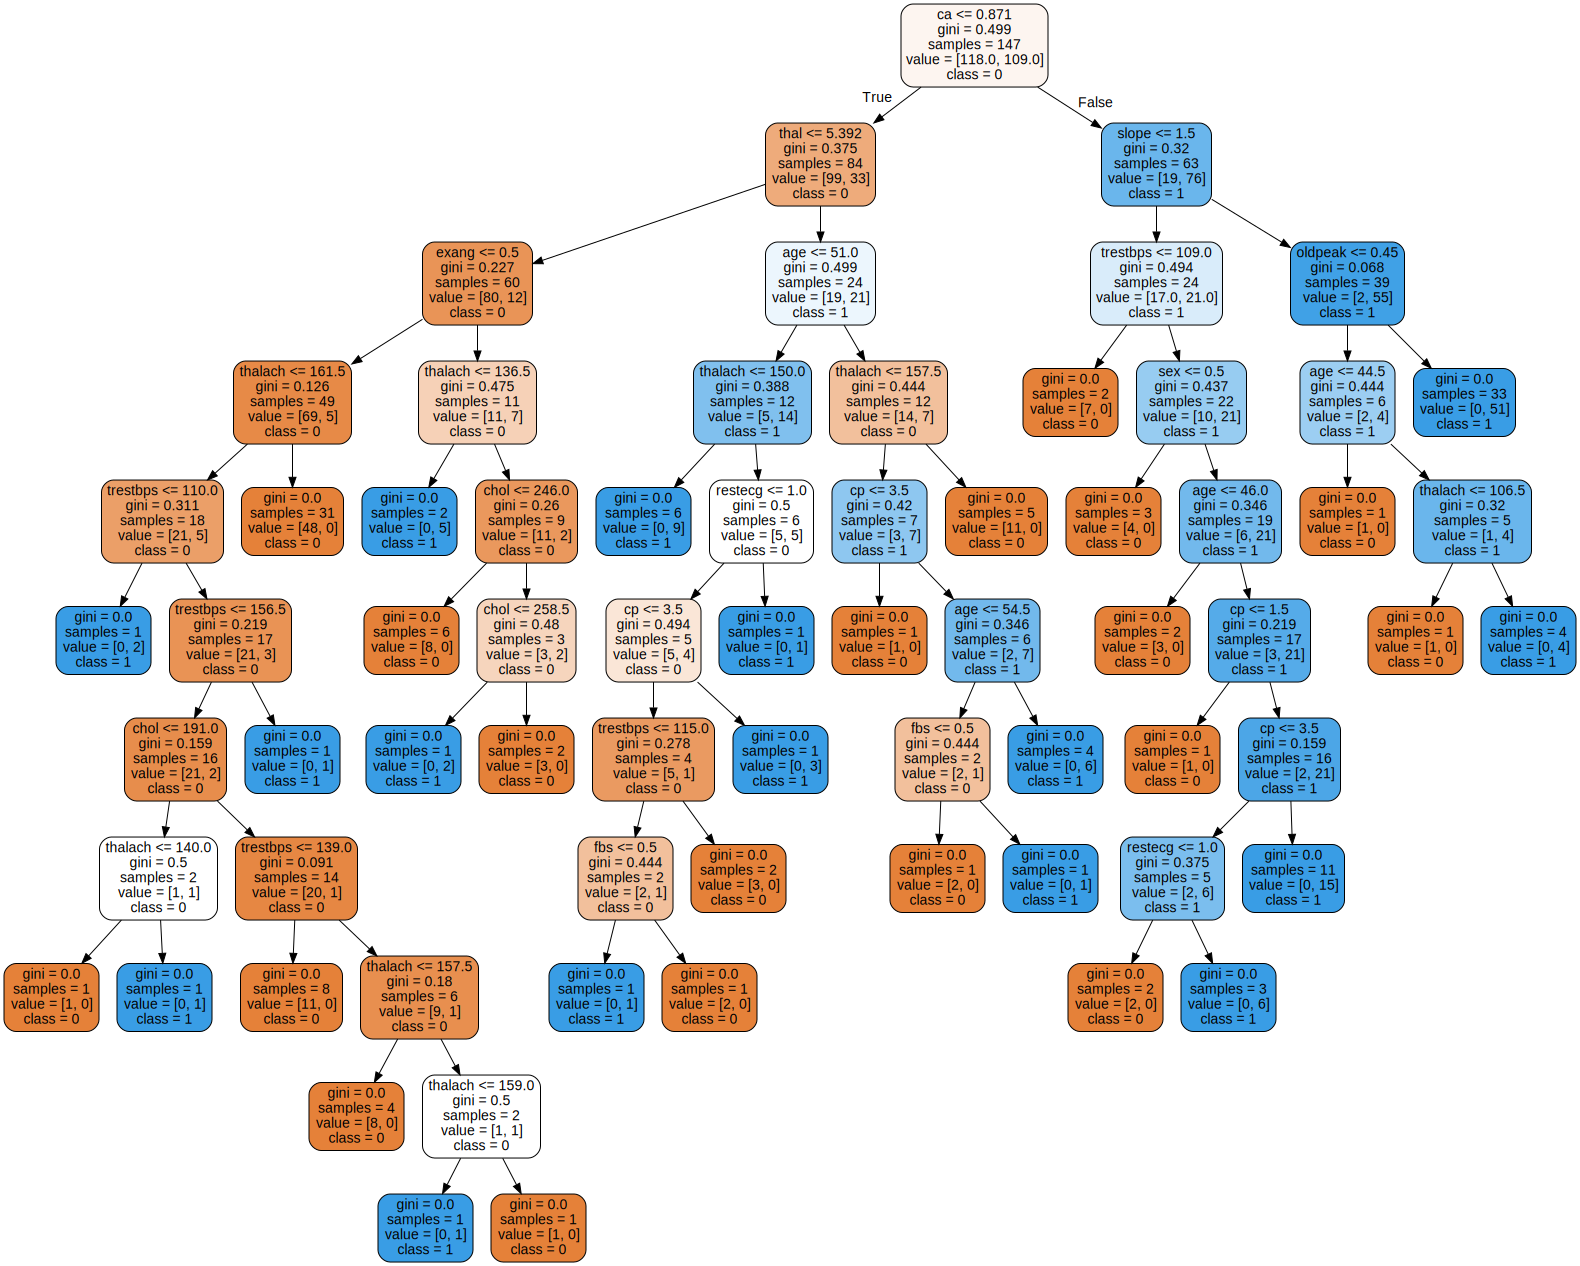

In [20]:
best_tree = grid_rf.best_estimator_.named_steps['model'].estimators_[0]

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=['0', '1']
)

graph = graphviz.Source(dot_data)
graph

In [22]:
print("Decision Tree best params:", grid_dt.best_params_)
print("Bagged Trees best params:", grid_bag.best_params_)
print("Random Forest best params:", grid_rf.best_params_)

Decision Tree best params: {'model__max_depth': 6, 'model__min_samples_leaf': 5, 'model__min_samples_split': 2}
Bagged Trees best params: {'model__estimator__max_depth': 3, 'model__max_samples': 0.8, 'model__n_estimators': 200}
Random Forest best params: {'model__max_depth': None, 'model__max_features': 'sqrt', 'model__n_estimators': 200}
